# 1. 数据载入

## 1.1 导包

In [1]:
# 导入所需要的库

import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 读入数据

In [2]:
# 读入daily_price,并以第二行做表头

path_daily = 'daily_price.xlsx'
data_daily = pd.read_excel(path_daily,skiprows=1)

In [3]:
# 读入monthly_price,并以第二行做表头

path_monthly = 'monthly_price_historical.xlsx'
data_monthly = pd.read_excel(path_monthly,skiprows=1)

## 1.3 数据基本信息 

### (1) 日度数据

In [4]:
# 数据基本信息的展示

data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84349 entries, 0 to 84348
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   varietyCode  84349 non-null  int64  
 1   marketCode   84349 non-null  int64  
 2   day          84349 non-null  object 
 3   avgPrice     84349 non-null  float64
 4   unit         84349 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.2+ MB


In [5]:
# 展示头5行数据

data_daily.head()

,varietyCode,marketCode,day,avgPrice,unit
0,13084,19639279,2021-11-05,4.5,元/公斤
1,13084,19639279,2021-11-07,4.5,元/公斤
2,13084,19639279,2021-11-08,4.5,元/公斤
3,13084,19639279,2021-11-09,4.5,元/公斤
4,13084,19639279,2021-11-10,4.5,元/公斤


In [6]:
# 展示后5行数据

data_daily.tail()

,varietyCode,marketCode,day,avgPrice,unit
84344,8754722,9348188,2022-05-16,24.0,元/公斤
84345,8754722,9348188,2022-05-17,24.0,元/公斤
84346,8754722,9348188,2022-05-18,24.0,元/公斤
84347,8754722,9348188,2022-05-19,24.0,元/公斤
84348,8754722,9348188,2022-05-20,24.0,元/公斤


In [7]:
# 替换非法字符'-'

data_daily.replace("-", np.NaN, inplace=True)

In [8]:
# 统计农产品分类情况

data_daily['varietyCode'].value_counts()

20413      17552
13508      17551
13103      11988
13245      10003
13233       8477
8754722     7038
13201       5055
13084       4281
13118       1344
13122       1060
Name: varietyCode, dtype: int64

In [9]:
# 统计批发市场分类情况

data_daily['marketCode'].value_counts()

20576      1478
21035      1375
20551      1353
20540      1312
20959      1290
           ... 
20728        89
21036        87
20822        55
9348019      18
20664         6
Name: marketCode, Length: 164, dtype: int64

In [10]:
# 查看单位是否统一

data_daily['unit'].value_counts()

元/公斤    84349
Name: unit, dtype: int64

### (2) 月度数据

In [11]:
# 数据基本信息的展示

data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590 entries, 0 to 5589
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   varietyCode  5590 non-null   int64 
 1   marketCode   5590 non-null   int64 
 2   year         5590 non-null   int64 
 3   price_Jan    5590 non-null   object
 4   price_Feb    5590 non-null   object
 5   price_Mar    5590 non-null   object
 6   price_Apr    5590 non-null   object
 7   price_May    5590 non-null   object
 8   price_Jun    5590 non-null   object
 9   price_Jul    5590 non-null   object
 10  price_Aug    5590 non-null   object
 11  price_Sept   5590 non-null   object
 12  price_Oct    5590 non-null   object
 13  price_Nov    5590 non-null   object
 14  price_Dec    5590 non-null   object
dtypes: int64(3), object(12)
memory usage: 655.2+ KB


In [12]:
# 展示头5行数据

data_monthly.head()

,varietyCode,marketCode,year,price_Jan,price_Feb,price_Mar,price_Apr,price_May,price_Jun,price_Jul,price_Aug,price_Sept,price_Oct,price_Nov,price_Dec
0,13084,19639279,2019,-,-,4.5,4.32,4.45,4.52,4.32,4.35,4.34,4.4,4.46,4.41
1,13084,19639279,2020,4.44,4.48,4.48,4.49,4.5,4.5,4.5,4.53,4.5,4.5,4.53,4.59
2,13084,19639279,2021,4.6,4.62,4.56,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5
3,13084,19639279,2022,4.45,4.46,4.4,-,-,-,-,-,-,-,-,-
4,13084,20531,2012,4.49,4.48,4.48,4.48,4.48,4.48,6.15,10.67,9.43,5.83,4.85,4.84


In [13]:
# 展示后5行数据

data_monthly.tail()

,varietyCode,marketCode,year,price_Jan,price_Feb,price_Mar,price_Apr,price_May,price_Jun,price_Jul,price_Aug,price_Sept,price_Oct,price_Nov,price_Dec
5585,8754722,9348188,2017,17,17,17,17,17,17,17,17,17,17,17,17
5586,8754722,9348188,2018,17,17,17,17,17,17,17,17.13,17.06,16.78,16.5,16.5
5587,8754722,9348188,2019,16.95,17.5,16.5,16.5,16.5,16.5,16.5,16.5,16.36,14.5,14.5,14.5
5588,8754722,9348188,2020,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,-,-,-,-
5589,8754722,9348188,2022,26.5,26.4,23.6,-,-,-,-,-,-,-,-,-


In [14]:
# 替换非法字符'-'

data_monthly.replace("-", np.NaN, inplace=True)
data_monthly.head()

,varietyCode,marketCode,year,price_Jan,price_Feb,price_Mar,price_Apr,price_May,price_Jun,price_Jul,price_Aug,price_Sept,price_Oct,price_Nov,price_Dec
0,13084,19639279,2019,NaN,NaN,4.5,4.32,4.45,4.52,4.32,4.35,4.34,4.4,4.46,4.41
1,13084,19639279,2020,4.44,4.48,4.48,4.49,4.5,4.5,4.5,4.53,4.5,4.5,4.53,4.59
2,13084,19639279,2021,4.6,4.62,4.56,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5
3,13084,19639279,2022,4.45,4.46,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13084,20531,2012,4.49,4.48,4.48,4.48,4.48,4.48,6.15,10.67,9.43,5.83,4.85,4.84


In [15]:
#转化数据类型

for k in range(data_monthly.shape[1]):
    if data_monthly[data_monthly.columns[k]].dtypes == 'object':
        data_monthly[data_monthly.columns[k]] = data_monthly[data_monthly.columns[k]].astype('float')
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590 entries, 0 to 5589
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   varietyCode  5590 non-null   int64  
 1   marketCode   5590 non-null   int64  
 2   year         5590 non-null   int64  
 3   price_Jan    5146 non-null   float64
 4   price_Feb    5079 non-null   float64
 5   price_Mar    5078 non-null   float64
 6   price_Apr    4526 non-null   float64
 7   price_May    4539 non-null   float64
 8   price_Jun    4469 non-null   float64
 9   price_Jul    4433 non-null   float64
 10  price_Aug    4435 non-null   float64
 11  price_Sept   4466 non-null   float64
 12  price_Oct    4497 non-null   float64
 13  price_Nov    4581 non-null   float64
 14  price_Dec    4631 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 655.2 KB


In [16]:
# 统计批发市场分类情况

data_monthly['marketCode'].value_counts()

21015       102
20531        96
20576        95
20551        89
20959        87
           ... 
72001026      4
72352035      3
71762601      3
45807         1
45271         1
Name: marketCode, Length: 170, dtype: int64

In [17]:
# 统计年份分类情况

data_monthly['year'].value_counts()

2022    672
2021    599
2020    507
2019    503
2013    498
2014    495
2015    480
2012    468
2016    465
2017    458
2018    445
Name: year, dtype: int64

# 2. 数据可视化与OLAP多维统计分析

## 2.1 日度数据

Text(0.5, 1.0, 'Classification statistics of each type of agricultural products')

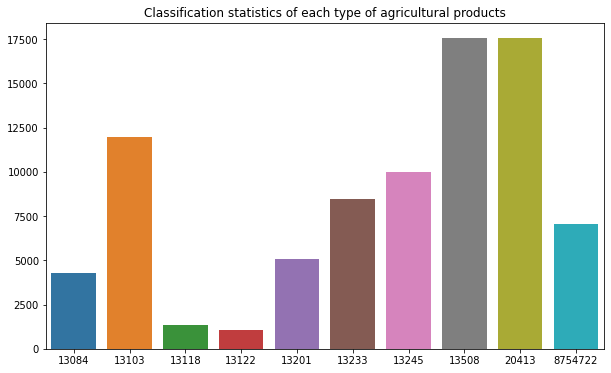

In [18]:
# 每类农产品的分类统计

plt.figure(figsize = (10,6))
sns.barplot(y=data_daily['varietyCode'].value_counts().values, x=data_daily['varietyCode'].value_counts().index)
plt.title('Classification statistics of each type of agricultural products')

In [19]:
# 处理日期变量

day = pd.to_datetime(data_daily['day'])
data_daily['day'] = day

In [20]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84349 entries, 0 to 84348
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   varietyCode  84349 non-null  int64         
 1   marketCode   84349 non-null  int64         
 2   day          84349 non-null  datetime64[ns]
 3   avgPrice     84349 non-null  float64       
 4   unit         84349 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.2+ MB


Text(0.5, 1.0, 'Agricultural price distribution map')

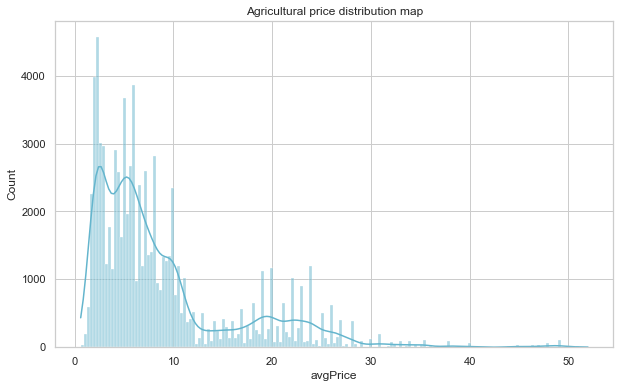

In [21]:
# 农产品价格分布图

sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.histplot(data_daily['avgPrice'],kde=True,color='c')
plt.title('Agricultural price distribution map')

In [22]:
# 构造满足需求的透视表

data1 = data_daily.pivot_table(index='day',columns='varietyCode',values='avgPrice')

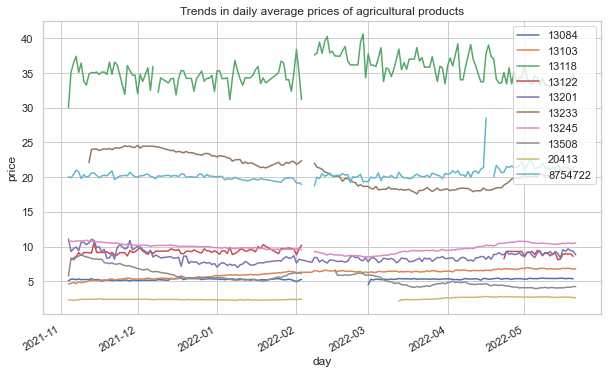

In [23]:
data1.plot(kind='line',figsize=(10,6))
plt.xlabel('day')
plt.ylabel('price')
plt.title('Trends in daily average prices of agricultural products')
plt.legend(loc=1)

In [24]:
# 将日期设置为索引

#data_daily.set_index(data_daily.day, inplace=True)

In [25]:
# 分组聚合

data_gb1 = data_daily.groupby('varietyCode')['avgPrice'].agg([np.mean,np.max,np.min])
data_gb1

,mean,amax,amin
varietyCode,,,
13084,5.293051,9.9,3.60
13103,6.128521,11.0,2.10
13118,35.228683,52.0,12.25
13122,9.236925,13.6,4.50
13201,8.478245,50.0,4.20
13233,21.107478,31.0,10.00
13245,9.818608,15.0,4.40
13508,5.432990,22.0,0.60
20413,2.491452,7.0,0.85


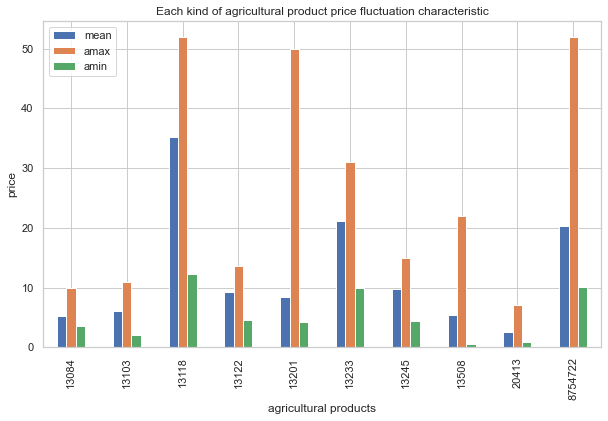

In [26]:
data_gb1.plot(kind = 'bar',figsize = (10,6))
plt.xlabel('agricultural products')
plt.ylabel('price')
plt.title('Each kind of agricultural product price fluctuation characteristic')
plt.legend(loc=2)

In [27]:
# 分组聚合

data_gb2 = data_daily.groupby(['varietyCode','marketCode'])['avgPrice'].agg([np.mean,np.max,np.min])
data_gb2

mean  amax  amin
varietyCode marketCode                       
13084       20531        5.500000   5.5   5.5
            20540        4.550327   4.6   4.5
            20551        4.900000   4.9   4.9
            20553        4.400000   4.4   4.4
            20571        4.412782   5.9   3.6
...                           ...   ...   ...
8754722     71893100    28.000000  28.0  28.0
            71959088    20.069828  40.0  12.6
            71995000    16.958333  17.5  16.5
            71995002    21.718750  23.5  19.0
            72004013    21.316406  23.5  19.0

[680 rows x 3 columns]

In [28]:
# 农产品最高的平均价格对应的市场批次，从下列表格中可以看出每类农产品在哪个市场批次中的平均价格最高

data_gb2_1 = data_gb2.reset_index()
data_gb2_2 = data_gb2_1[['varietyCode','mean']].groupby(['varietyCode']).max()
data_gb2_merge1 = pd.merge(data_gb2_2,data_gb2_1,on=['varietyCode','mean'],how='left')
data_gb2_merge1.rename(columns={'mean':'max_mean'}, inplace = True)
data_gb2_merge1

,varietyCode,max_mean,marketCode,amax,amin
0,13084,8.193000,20747,8.5,7.6
1,13103,8.690659,21035,11.0,7.5
2,13118,48.338235,20536,52.0,25.0
3,13122,13.000000,21015,13.0,13.0
4,13201,41.391304,20754,50.0,39.0
5,13233,28.147541,21081,30.0,25.0
6,13245,13.687179,71762601,14.6,13.6
7,13508,11.650336,20799,15.0,2.5
8,20413,5.358974,71762601,6.0,5.0
9,8754722,49.137500,45669,52.0,48.0


In [29]:
# 农产品最低的平均价格对应的市场批次，从下列表格中可以看出每类农产品在哪个市场批次中的平均价格最低

data_gb2_3 = data_gb2_1[['varietyCode','mean']].groupby(['varietyCode']).min()
data_gb2_merge2 = pd.merge(data_gb2_3,data_gb2_1,on=['varietyCode','mean'],how='left')
data_gb2_merge2.rename(columns={'mean':'min_mean'}, inplace = True)
data_gb2_merge2

,varietyCode,min_mean,marketCode,amax,amin
0,13084,4.000000,71830459,4.00,4.00
1,13103,3.576182,71830357,4.07,3.35
2,13118,12.250000,9348019,12.25,12.25
3,13122,4.500000,20576,4.50,4.50
4,13201,4.601379,2547980,5.20,4.40
5,13233,10.833333,20651,11.00,10.00
6,13245,5.412500,70801139,7.40,4.40
7,13508,2.163964,71860010,4.00,1.10
8,20413,1.429924,71851039,1.90,1.20
9,8754722,11.926772,20687,12.80,10.15


## 2.2 月度数据

Text(0.5, 1.0, 'Classification statistics of each type of agricultural products')

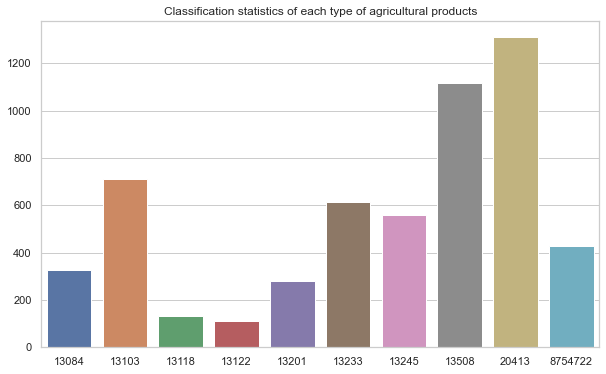

In [30]:
# 每类农产品的分类统计

plt.figure(figsize = (10,6))
sns.barplot(y=data_monthly['varietyCode'].value_counts().values, x=data_monthly['varietyCode'].value_counts().index)
plt.title('Classification statistics of each type of agricultural products')

Text(0.5, 1.0, 'Year classification statistics')

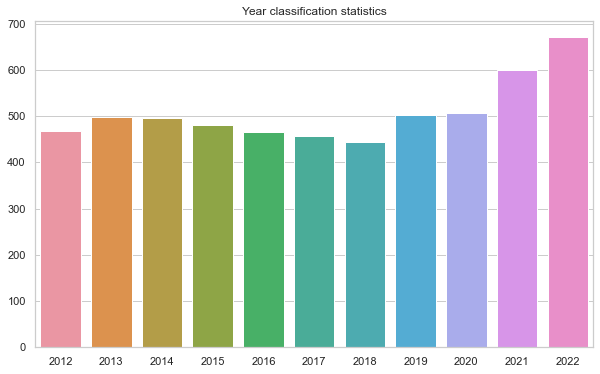

In [31]:
# 年份的分类统计

plt.figure(figsize = (10,6))
sns.barplot(y=data_monthly['year'].value_counts().values, x=data_monthly['year'].value_counts().index)
plt.title('Year classification statistics')

In [32]:
# 每类农产品不同市场批次下每年度的平均值

data_monthly['year_mean'] = data_monthly[[ 'price_Jan', 'price_Feb',
       'price_Mar', 'price_Apr', 'price_May', 'price_Jun', 'price_Jul',
       'price_Aug', 'price_Sept', 'price_Oct', 'price_Nov', 'price_Dec']].mean(axis=1)
data_monthly['year_mean']

0        4.407000
1        4.503333
2        4.523333
3        4.436667
4        5.721667
          ...    
5585    17.000000
5586    16.914167
5587    16.109167
5588    14.500000
5589    25.500000
Name: year_mean, Length: 5590, dtype: float64

In [33]:
# 分组聚合

data_gb3 = data_monthly.groupby(['varietyCode','year'])['year_mean'].agg([np.mean,np.max,np.min])
data_gb3

mean       amax       amin
varietyCode year                                 
13084       2012   5.014947   6.082727   3.000000
            2013   5.071786   6.356667   3.820833
            2014   5.020060   7.408333   2.200000
            2015   5.195893   7.500000   4.100000
            2016   5.268516   7.500000   4.157500
...                     ...        ...        ...
8754722     2018  15.631370  38.000000  10.651667
            2019  14.939519  38.838000   9.667500
            2020  17.607476  34.249000   9.000000
            2021  20.717576  31.230000   9.000000
            2022  20.362091  48.000000  11.700000

[109 rows x 3 columns]

In [34]:
# 构造满足需求的透视表

data2 = data_gb3.pivot_table(index='year',columns='varietyCode',values='mean')

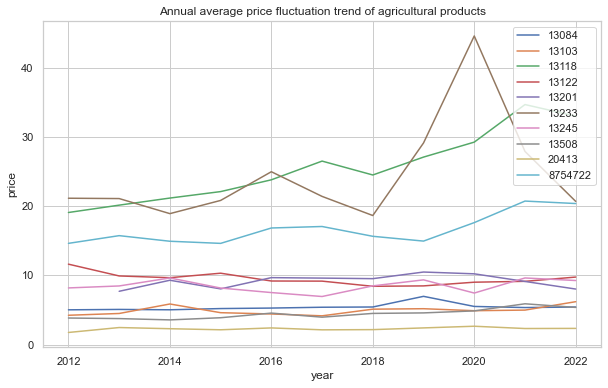

In [35]:
data2.plot(kind='line',figsize=(10,6))
plt.xlabel('year')
plt.ylabel('price')
plt.title('Annual average price fluctuation trend of agricultural products')
plt.legend(loc=1)

In [36]:
# 分组聚合

data_gb4 = data_monthly.groupby(['varietyCode','marketCode'])['year_mean'].agg([np.mean,np.max,np.min])
data_gb4

mean       amax       amin
varietyCode marketCode                                 
13084       20531        5.160202   5.721667   4.600000
            20540        4.522000   4.663333   4.500000
            20542        5.865833   5.900000   5.831667
            20551        4.819500   4.900000   4.710833
            20553        5.023258   5.491667   4.342500
...                           ...        ...        ...
8754722     71893100    28.000000  28.000000  28.000000
            71959088    18.906667  18.906667  18.906667
            71995000    17.113333  17.113333  17.113333
            71995002    20.413333  20.413333  20.413333
            72004013    20.993333  20.993333  20.993333

[759 rows x 3 columns]

In [37]:
# 农产品最高的平均价格对应的市场批次，从下列表格中可以看出多个年度以来每类农产品在哪个市场批次中的平均价格最高

data_gb4_1 = data_gb4.reset_index()
data_gb4_2 = data_gb4_1[['varietyCode','mean']].groupby(['varietyCode']).max()
data_gb4_merge1 = pd.merge(data_gb4_2,data_gb4_1,on=['varietyCode','mean'],how='left')
data_gb4_merge1.rename(columns={'mean':'max_mean'}, inplace = True)
data_gb4_merge1

,varietyCode,max_mean,marketCode,amax,amin
0,13084,30.133929,20801,54.742857,5.525000
1,13103,8.253333,71716769,8.253333,8.253333
2,13118,38.125000,20707,38.125000,38.125000
3,13122,17.500000,9348188,17.500000,17.500000
4,13201,30.347683,20754,49.405556,20.000000
5,13233,35.370208,21124,45.610000,24.823333
6,13245,13.388333,71762601,13.388333,13.388333
7,13508,9.054167,71830225,10.015000,8.093333
8,20413,4.870000,71762601,4.870000,4.870000
9,8754722,48.000000,45669,48.000000,48.000000


In [38]:
# 农产品最低的平均价格对应的市场批次，从下列表格中可以看出多个年度以来每类农产品在哪个市场批次中的平均价格最低

data_gb4_3 = data_gb4_1[['varietyCode','mean']].groupby(['varietyCode']).min()
data_gb4_merge2 = pd.merge(data_gb4_3,data_gb4_1,on=['varietyCode','mean'],how='left')
data_gb4_merge2.rename(columns={'mean':'min_mean'}, inplace = True)
data_gb4_merge2

,varietyCode,min_mean,marketCode,amax,amin
0,13084,3.915000,71830481,4.030000,3.800000
1,13103,2.857917,20542,3.285000,2.430833
2,13118,9.696759,20652,14.667500,7.298333
3,13122,3.400000,20553,3.400000,3.400000
4,13201,2.800000,20776,2.800000,2.800000
5,13233,15.974167,20651,21.118333,10.830000
6,13245,4.916667,70801139,4.916667,4.916667
7,13508,1.240000,20732,1.627500,0.530000
8,20413,1.340000,71995000,1.340000,1.340000
9,8754722,9.288889,20728,9.288889,9.288889


In [39]:
# 分组聚合

data_gb5 = data_monthly.groupby(['varietyCode'])[['price_Jan', 'price_Feb',
       'price_Mar', 'price_Apr', 'price_May', 'price_Jun', 'price_Jul',
       'price_Aug', 'price_Sept', 'price_Oct', 'price_Nov', 'price_Dec']].agg([np.mean])
data_gb5

,price_Jan,price_Feb,price_Mar,price_Apr,price_May,price_Jun,price_Jul,price_Aug,price_Sept,price_Oct,price_Nov,price_Dec
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
varietyCode,,,,,,,,,,,,
13084,5.287124,5.301419,5.264330,5.270943,5.681842,5.688593,5.707786,5.300000,5.301718,5.297424,5.285448,5.312519
13103,4.792466,5.139587,5.207546,5.026649,5.071377,4.933472,4.666487,4.708939,4.894439,4.672269,4.552950,4.554075
13118,24.765984,25.313540,25.196018,24.400654,24.384245,24.480566,24.455833,24.510833,24.732778,24.897290,24.878396,24.933925
13122,10.075233,10.218675,10.303735,10.335325,10.158537,10.114578,9.498118,9.396977,9.245882,9.205238,9.632381,9.931139
13201,8.527963,8.772765,8.977972,9.678033,10.345965,10.751579,11.013826,9.780258,9.092176,8.720449,8.623946,8.547536
13233,26.686205,26.065260,24.488831,23.906113,23.000600,23.084864,24.069455,25.119630,25.766706,25.857037,26.111445,26.396987
13245,8.834472,8.172658,7.655145,7.529496,7.721503,7.732522,7.909477,9.025531,9.646204,8.970543,8.968387,8.875172
13508,4.517576,4.909342,3.602981,2.992363,2.965350,3.849976,5.331337,6.829853,6.007910,4.603478,3.911227,4.068304


In [40]:
# 重置列名

col = ['1','2','3','4','5','6','7','8','9','10','11','12']
data_gb5.columns = col
row = data_monthly['varietyCode'].unique()

In [41]:
# 行列的转置

data_gb5 = pd.DataFrame(data_gb5.values.T,columns=row,index=col)
data_gb5

,13084,13103,13118,13122,13201,13233,13245,13508,20413,8754722
1,5.287124,4.792466,24.765984,10.075233,8.527963,26.686205,8.834472,4.517576,2.274573,15.629722
2,5.301419,5.139587,25.313540,10.218675,8.772765,26.065260,8.172658,4.909342,2.443439,15.966964
3,5.264330,5.207546,25.196018,10.303735,8.977972,24.488831,7.655145,3.602981,2.478182,15.913667
4,5.270943,5.026649,24.400654,10.335325,9.678033,23.906113,7.529496,2.992363,2.573753,15.612406
5,5.681842,5.071377,24.384245,10.158537,10.345965,23.000600,7.721503,2.965350,2.595041,16.516791
6,5.688593,4.933472,24.480566,10.114578,10.751579,23.084864,7.732522,3.849976,2.292369,17.087077
7,5.707786,4.666487,24.455833,9.498118,11.013826,24.069455,7.909477,5.331337,2.062045,17.500086
8,5.300000,4.708939,24.510833,9.396977,9.780258,25.119630,9.025531,6.829853,2.078327,17.460745
9,5.301718,4.894439,24.732778,9.245882,9.092176,25.766706,9.646204,6.007910,2.033589,17.106994
10,5.297424,4.672269,24.897290,9.205238,8.720449,25.857037,8.970543,4.603478,2.020872,16.450058


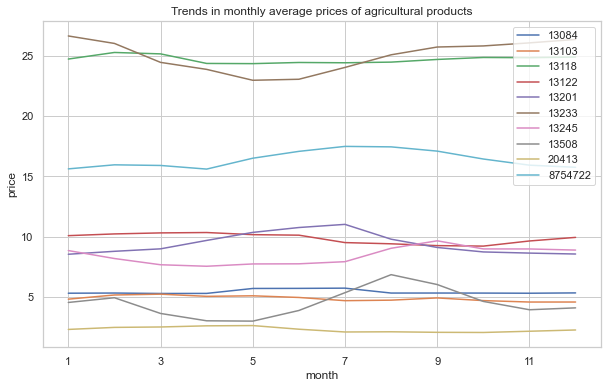

In [42]:
data_gb5.plot(kind='line',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('price')
plt.title('Trends in monthly average prices of agricultural products')
plt.legend(loc=1)

# 3. 模型构建与价格预测

## 3.1 数据预处理

In [43]:
# 查看daily数据缺失值

data_daily.isnull().sum()

varietyCode    0
marketCode     0
day            0
avgPrice       0
unit           0
dtype: int64

In [44]:
# 查看monthly数据缺失值

data_monthly.isnull().sum()

varietyCode       0
marketCode        0
year              0
price_Jan       444
price_Feb       511
price_Mar       512
price_Apr      1064
price_May      1051
price_Jun      1121
price_Jul      1157
price_Aug      1155
price_Sept     1124
price_Oct      1093
price_Nov      1009
price_Dec       959
year_mean         0
dtype: int64

In [45]:
# 统计缺失值数量
missing=data_monthly.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/data_monthly.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 存储的是每个变量缺失情况的数据框

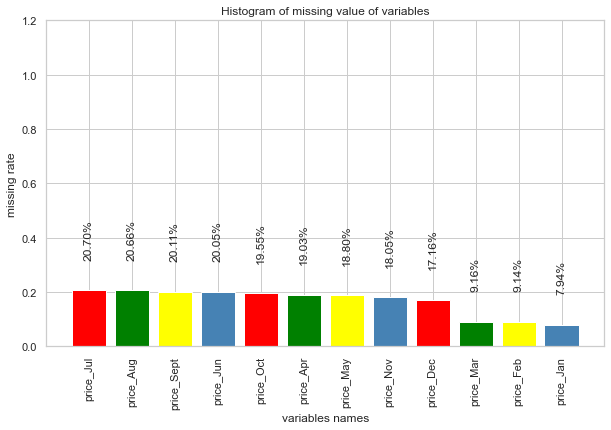

In [46]:
#  缺失值柱形图可视化

fig = plt.figure(figsize=(10,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')

# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)

# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])

plt.show()

In [47]:
# 缺失值处理，对缺失值进行插补

null_columns = ['price_Jan', 'price_Feb','price_Mar', 'price_Apr', 'price_May', 'price_Jun', 'price_Jul',
                 'price_Aug', 'price_Sept', 'price_Oct', 'price_Nov', 'price_Dec']
data_monthly_new = data_monthly.copy()
for i in null_columns:
    data_monthly_new[i] = data_monthly[i].interpolate(method='linear', limit_direction='forward', axis=0)

In [48]:
data_monthly_new.isnull().sum()

varietyCode    0
marketCode     0
year           0
price_Jan      1
price_Feb      1
price_Mar      0
price_Apr      0
price_May      0
price_Jun      0
price_Jul      0
price_Aug      0
price_Sept     0
price_Oct      0
price_Nov      0
price_Dec      0
year_mean      0
dtype: int64

## 3.2 模型数据准备

### (1) daily_data

In [49]:
# 分组聚合

data_gb6 = data_daily.groupby(['varietyCode','day'])['avgPrice'].agg([np.mean,np.max,np.min])
data_gb6                                                          

mean  amax  amin
varietyCode day                              
13084       2021-11-04   5.061538   6.4   3.6
            2021-11-05   5.302273   7.6   3.6
            2021-11-06   5.327500   7.6   3.6
            2021-11-07   5.232500   7.6   3.6
            2021-11-08   5.328261   7.9   4.0
...                           ...   ...   ...
8754722     2022-05-17  21.346136  51.0  11.5
            2022-05-18  21.351818  51.0  11.5
            2022-05-19  21.147143  51.0  11.5
            2022-05-20  21.334773  51.0  11.5
            2022-05-21  21.612286  51.0  12.0

[1713 rows x 3 columns]

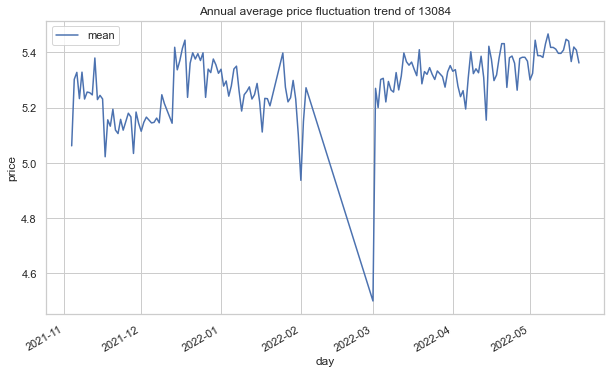

In [50]:
# 13084号农产品的价格走势图

data_gb6_1 = data_gb6.query("varietyCode==[13084]")['mean'].reset_index('varietyCode')[['mean']]
data_gb6_1.plot(kind='line',figsize=(10,6))
plt.xlabel('day')
plt.ylabel('price')
plt.title('Annual average price fluctuation trend of 13084')
plt.legend(loc=2)

### (2) monthly_data

In [51]:
# 分组聚合

data_gb7 = data_monthly_new.groupby(['varietyCode','year'])[['price_Jan', 'price_Feb',
       'price_Mar', 'price_Apr', 'price_May', 'price_Jun', 'price_Jul',
       'price_Aug', 'price_Sept', 'price_Oct', 'price_Nov', 'price_Dec']].agg([np.mean])
data_gb7

price_Jan  price_Feb  price_Mar  price_Apr  price_May  \
                       mean       mean       mean       mean       mean   
varietyCode year                                                          
13084       2012   5.071667   5.011667   5.000000   5.037284   5.020679   
            2013   5.144286   5.081250   5.020536   5.028036   5.023899   
            2014   5.123571   5.111190   5.089643   5.112679   5.030357   
            2015   5.168571   5.158929   5.164286   5.211429   5.208571   
            2016   5.280000   5.241154   5.219231   5.252308   5.268269   
...                     ...        ...        ...        ...        ...   
8754722     2018  15.918750  16.399062  16.013021  15.731302  15.555260   
            2019  15.080610  15.510163  15.022764  14.096057  14.276748   
            2020  15.469231  16.365940  16.191581  16.643291  17.526752   
            2021  17.374167  17.749881  18.520159  19.821111  22.477937   
            2022  19.564909  20.176061  19.717061  17.058515  18.651242   

                  price_Jun  price_Jul  price_Aug price_Sept  price_Oct  \
                       mean       mean       mean       mean       mean   
varietyCode year                                                          
13084       2012   4.966235   4.996543   5.209259   5.285432   5.231235   
            2013   5.060952   5.060774   5.078631   5.092917   5.069107   
            2014   5.114107   5.141607   5.125000   5.137857   5.151786   
            2015   5.214524   5.249762   5.281964   5.303571   5.293929   
            2016   5.273974   5.278333   5.291538   5.316154   5.264615   
...                     ...        ...        ...        ...        ...   
8754722     2018  15.428750  15.411719  15.406302  15.494438  15.230417   
            2019  14.551951  15.046585  15.744228  15.966927  15.456098   
            2020  18.718205  19.910128  19.556538  19.154615  18.140000   
            2021  23.619048  23.915357  22.787619  21.832381  20.453545   
            2022  19.435012  19.680788  18.923848  18.529412  17.837444   

                  price_Nov  price_Dec  
                       mean       mean  
varietyCode year                        
13084       2012   5.198889   5.134815  
            2013   5.029464   5.068929  
            2014   5.182262   5.171905  
            2015   5.280179   5.287857  
            2016   5.243846   5.252308  
...                     ...        ...  
8754722     2018  15.015771  14.847292  
            2019  15.140573  15.075305  
            2020  16.783333  16.345983  
            2021  19.579762  19.835079  
            2022  16.942033  17.736333  

[109 rows x 12 columns]

In [52]:
data_gb7_1 = data_gb7.query("varietyCode==[13084]").reset_index('varietyCode').drop(['varietyCode'],axis=1,level=0)
data_gb7_1

,price_Jan,price_Feb,price_Mar,price_Apr,price_May,price_Jun,price_Jul,price_Aug,price_Sept,price_Oct,price_Nov,price_Dec
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
year,,,,,,,,,,,,
2012,5.071667,5.011667,5.000000,5.037284,5.020679,4.966235,4.996543,5.209259,5.285432,5.231235,5.198889,5.134815
2013,5.144286,5.081250,5.020536,5.028036,5.023899,5.060952,5.060774,5.078631,5.092917,5.069107,5.029464,5.068929
2014,5.123571,5.111190,5.089643,5.112679,5.030357,5.114107,5.141607,5.125000,5.137857,5.151786,5.182262,5.171905
2015,5.168571,5.158929,5.164286,5.211429,5.208571,5.214524,5.249762,5.281964,5.303571,5.293929,5.280179,5.287857
2016,5.280000,5.241154,5.219231,5.252308,5.268269,5.273974,5.278333,5.291538,5.316154,5.264615,5.243846,5.252308
2017,5.259643,5.375714,5.396786,5.417321,5.400536,5.405536,5.438750,5.406607,5.388214,5.375357,5.371071,5.375357
2018,5.407407,5.440000,5.432963,5.448148,5.447037,5.447407,5.434444,5.393333,5.365926,5.360741,5.402963,5.413426
2019,5.446452,5.486344,5.414062,5.384115,8.957031,8.964375,8.982500,5.435625,5.411562,5.488437,5.518125,5.487969


In [53]:
# 重置列名

col = ['1','2','3','4','5','6','7','8','9','10','11','12']
data_gb7_1.columns = col
row = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [54]:
# 行列的转置

data_gb7_2 = pd.DataFrame(data_gb7_1.values.T,columns=row,index=col)
data_gb7_2

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,5.071667,5.144286,5.123571,5.168571,5.280000,5.259643,5.407407,5.446452,5.514032,5.393529,5.298919
2,5.011667,5.081250,5.111190,5.158929,5.241154,5.375714,5.440000,5.486344,5.512742,5.411324,5.439189
3,5.000000,5.020536,5.089643,5.164286,5.219231,5.396786,5.432963,5.414062,5.474032,5.350490,5.322117
4,5.037284,5.028036,5.112679,5.211429,5.252308,5.417321,5.448148,5.384115,5.473495,5.294550,5.190098
5,5.020679,5.023899,5.030357,5.208571,5.268269,5.400536,5.447037,8.957031,5.465108,5.211707,6.674085
6,4.966235,5.060952,5.114107,5.214524,5.273974,5.405536,5.447407,8.964375,5.461075,5.160040,6.603251
7,4.996543,5.060774,5.141607,5.249762,5.278333,5.438750,5.434444,8.982500,5.500968,5.219588,6.637315
8,5.209259,5.078631,5.125000,5.281964,5.291538,5.406607,5.393333,5.435625,5.504194,5.244804,5.192432
9,5.285432,5.092917,5.137857,5.303571,5.316154,5.388214,5.365926,5.411562,5.413280,5.254706,5.226081
10,5.231235,5.069107,5.151786,5.293929,5.264615,5.375357,5.360741,5.488437,5.439946,5.279461,5.229505


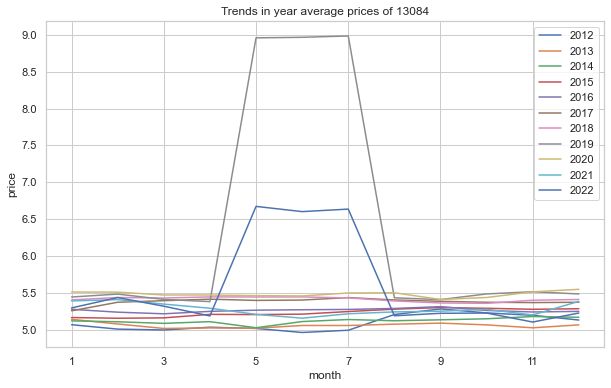

In [55]:
data_gb7_2.plot(kind='line',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('price')
plt.title('Trends in year average prices of 13084')
plt.legend(loc=1)

In [56]:
# 合并成一列数据

data_gb7_3=pd.concat(data_gb7_2.iloc[:,i] for i in range(data_gb7_2.shape[1]))
data_gb7_3

1     5.071667
2     5.011667
3     5.000000
4     5.037284
5     5.020679
        ...   
8     5.192432
9     5.226081
10    5.229505
11    5.107658
12    5.229775
Length: 132, dtype: float64

In [57]:
data_gb7_3_index = pd.date_range(start='2012-01',end='2023-1', freq='M')
data_gb7_3.index = data_gb7_3_index
data_gb7_3

2012-01-31    5.071667
2012-02-29    5.011667
2012-03-31    5.000000
2012-04-30    5.037284
2012-05-31    5.020679
                ...   
2022-08-31    5.192432
2022-09-30    5.226081
2022-10-31    5.229505
2022-11-30    5.107658
2022-12-31    5.229775
Freq: M, Length: 132, dtype: float64

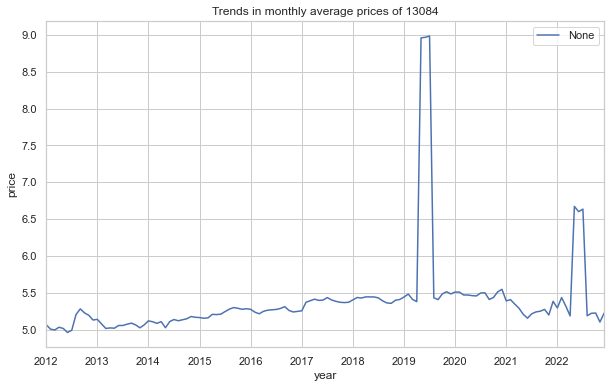

In [58]:
# # 13084号农产品的价格走势图

data_gb7_3.plot(kind='line',figsize=(10,6))
plt.xlabel('year')
plt.ylabel('price')
plt.title('Trends in monthly average prices of 13084')
plt.legend(loc=1)

## 3.3 ARIMA模型

In [59]:
# 添加基础库

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf       # 自相关图函数
from statsmodels.tsa.stattools import adfuller as ADF   # 平稳性检验
from statsmodels.graphics.tsaplots import plot_pacf     # 偏自相关图函数
from statsmodels.stats.diagnostic import acorr_ljungbox # 白噪声检验函数

### (1) daily_data

### 自相关

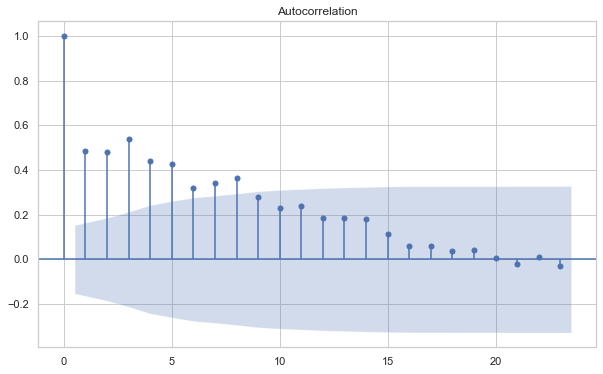

In [60]:
# 绘制自相关图，判断序列是否自相关

fig = plot_acf(data_gb6_1)
fig.set_size_inches(10, 6)
plt.show()

由自相关图可以看出，在8阶后才落入区间内，并且自相关系数长期大于零，显示出较强的自相关性。

### 平稳性检验

In [61]:
# 返回值依次为 adf 、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

ADF(data_gb6_1['mean'])

(-2.495970239818855,
 0.11645789027525894,
 3,
 160,
 {'1%': -3.4718957209472654,
  '5%': -2.8797795410156253,
  '10%': -2.5764947265625},
 -289.1046665546489)

### 时间序列的差分d

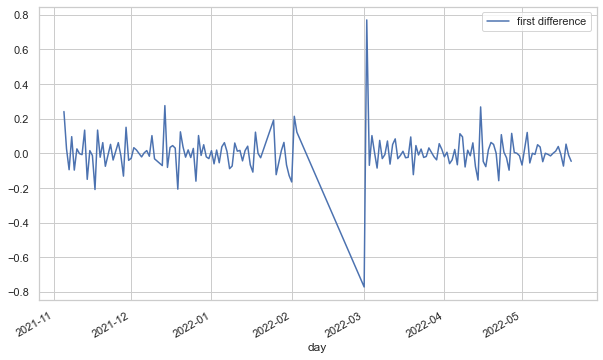

In [62]:
# 时间序列的差分d

D_data = data_gb6_1.diff().dropna()
D_data.columns = ['first difference']
D_data.plot(figsize=(10,6)) #时序图
plt.show()

ARIMA模型对时间序列的要求是平稳型。因此当得到一个非平稳的时间序列时，首先要做的是时间序列的差分，直到得到一个平稳时间序列。如果对时间序列做

d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。

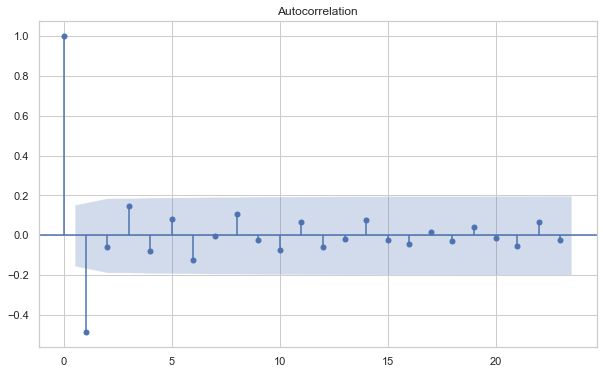

In [63]:
# 自相关图

fig = plot_acf(D_data)
fig.set_size_inches(10, 6)
plt.show()

差分后的序列迅速落入区间，并呈现向0靠拢的趋势，序列没有自相关性。

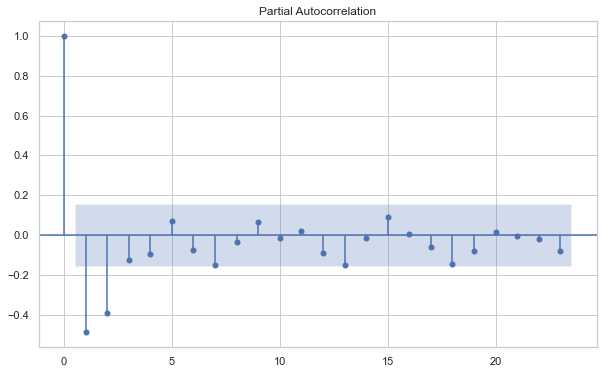

In [64]:
# 偏自相关检验

fig = plot_pacf(D_data)
fig.set_size_inches(10, 6)
plt.show()

由偏自相关图可以看出，差分后的序列也没有显示出偏自相关性。

In [65]:
# 平稳性检验

ADF(D_data['first difference'])

(-11.616599648327162,
 2.4404547722812852e-21,
 2,
 160,
 {'1%': -3.4718957209472654,
  '5%': -2.8797795410156253,
  '10%': -2.5764947265625},
 -281.8899489861043)

In [66]:
# 白噪声检验

acorr_ljungbox(D_data,lags=20,return_df =bool) # lags表示滞后的阶数

,lb_stat,lb_pvalue
1,39.380960,3.486803e-10
2,39.956483,2.106493e-09
3,43.714165,1.735622e-09
4,44.774072,4.430053e-09
5,45.904515,9.497837e-09
6,48.433047,9.681004e-09
7,48.437043,2.924474e-08
8,50.508161,3.263362e-08
9,50.615842,8.249179e-08
10,51.540505,1.387804e-07


主要看第二列的P值，lags为检验的延迟数，一般指定是20，或是序列长度，每一个P值都小于0.05或等于0，说明该数据不是白噪声数据，数据有价值，可以继续分析。

反之如果大于0.05，则说明是白噪声序列，是纯随机性序列

###  p,q值的确定

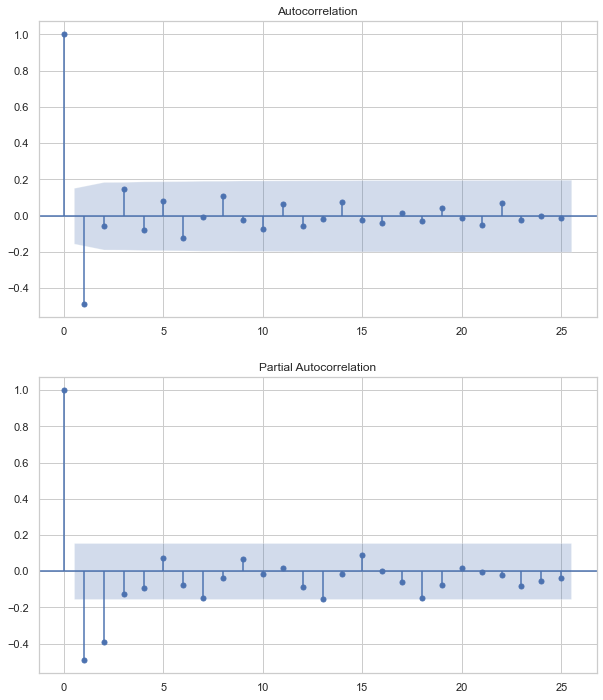

In [67]:
# 第一步，要先检查平稳时间序列的自相关图和偏自相关图

# 模型定阶，确定合适的p,q
dta = data_gb6_1.diff(1)[1:]
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211)
fig1 = plot_acf(dta['mean'],lags=25,ax=ax1) # lags表示滞后的阶数
ax2 = fig.add_subplot(212)
fig2 = plot_pacf(dta['mean'],lags=25,ax=ax2)
plt.show()

通过两图观察得到：

    •自相关图显示滞后1阶超出了置信边界

    •偏相关图显示在滞后1至2阶时的偏自相关系数超出了置信边界，从lag9之后偏自相关系数值缩小至0
    
则有以下模型可以供选择：

    •ARMA(0,1)模型：即自相关图在滞后1阶之后缩小为0，且偏自相关缩小至0，则是一个阶数q=2的移动平均模型
    
    •ARMA(9,0)模型：即偏自相关图在滞后9阶之后缩小为0，且自相关缩小至0，则是一个阶数p=1的自回归模型
    
    •ARMA(9,1)模型：即使得自相关和偏自相关都缩小至零，则是一个混合模型。

针对可供选择的模型，通常采用ARMA模型的AIC法则，AIC鼓励数据拟合的优良性，但应尽量避免出现过度拟合的情况；

赤池信息准则的方法是寻找可以最好地解释数据但包含最少自由参数的模型。

In [68]:
# 忽略警告

import warnings  
warnings.filterwarnings('ignore')

In [69]:
# AIC、BIC、HQ，统计量检验

arma_mod01 = sm.tsa.ARMA(dta,(0,1)).fit()
print('ARMA(0,1)模型：\nAIC：',arma_mod01.aic,'\nBIC：',arma_mod01.bic,'\nHQ统计量：',arma_mod01.hqic)

arma_mod90 = sm.tsa.ARMA(dta,(9,0)).fit()
print('\nARMA(9,0)模型：\nAIC：',arma_mod90.aic,'\nBIC：',arma_mod90.bic,'\nHQ统计量：',arma_mod90.hqic)

arma_mod91 = sm.tsa.ARMA(dta,(9,1)).fit()
print('\nARMA(9,1)模型：\nAIC：',arma_mod91.aic,'\nBIC：',arma_mod91.bic,'\nHQ统计量：',arma_mod91.hqic)

ARMA(0,1)模型：
AIC： -307.2560691257742 
BIC： -297.9748185233539 
HQ统计量： -303.4879831011989

ARMA(9,0)模型：
AIC： -301.3874960887877 
BIC： -267.35624387991334 
HQ统计量： -287.57118066534485

ARMA(9,1)模型：
AIC： -299.5352398215628 
BIC： -262.41023741188167 
HQ统计量： -284.4628957232615


对比发现，ARMA(0,1)的aic,bic,hqic均最小，因此是最佳模型。

### 模型检验

对于选择的模型，观察ARMA模型的残差是否是平均值为0且方差为常数（服从零均值、方差不变的正态分布），同时也要观察连续残差是否（自）相关。

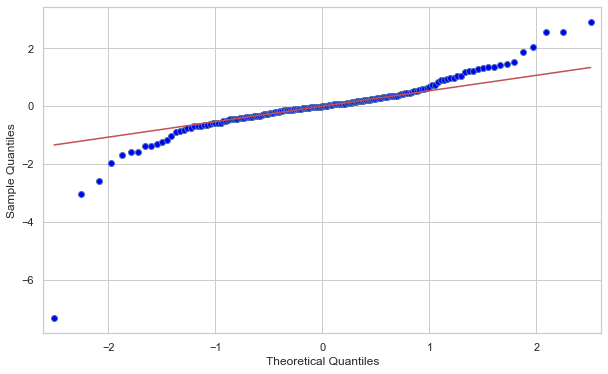

In [70]:
# 残差图

resid = arma_mod01.resid
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
qqplot(resid,line='q',ax=ax,fit=True)
plt.show()

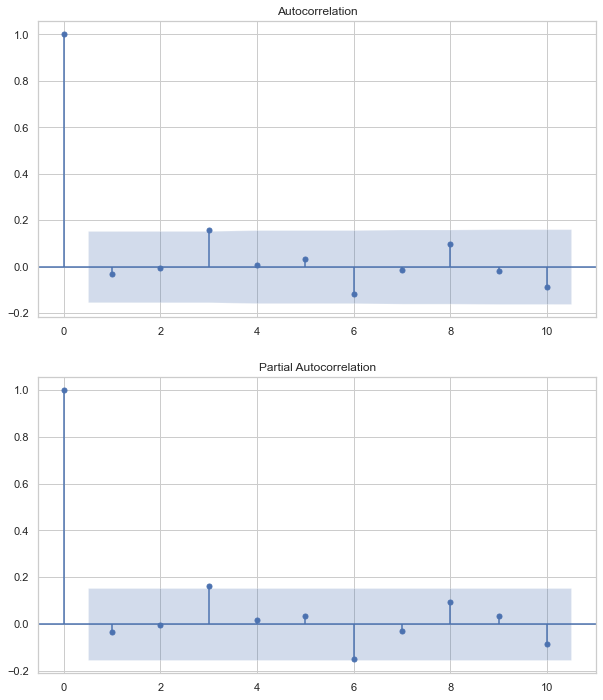

In [71]:
# 残差自相关检验

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211)
plot_acf(resid.values.squeeze(),lags=10,ax=ax1)   # squeeze 函数：从数组的形状中删除单维度条目，即把shape中为1的维度去掉
ax2 = fig.add_subplot(212)
plot_pacf(resid.values.squeeze(),lags=10,ax=ax2)
plt.show()

In [72]:
# D-W检验

'''
目前检验自相关性最常用的方法，但只适用于检验一阶自相关性。
- DW=0,存在正自相关
- DW=4,存在负自相关
- DW=2,不存在（一阶）自相关
'''
print('DW检验值：',sm.stats.durbin_watson(resid.values))

DW检验值： 2.023179792593794


Ljung-Box检验

    Ljung-Box检验是对随机性的检验，或者说是对时间序列是否存在滞后相关的一种统计检验。LB检验是基于一系列滞后阶数，判断序列总体的相关性或者随机性是否存在。而ACF或者PACF都仅仅考虑是否存在某一特定滞后阶数的相关（对于滞后相关的检验，常用的方法还是计算ACF和PACF并观察其图像）

    时间序列中一个最基本的模型就是高斯白噪声序列。对于ARIMA模型，其残差被假定为高斯白噪声序列，因此当用ARIMA模型去拟合数据时，拟合后要对残差的估计序列进行LB检验，判断其是否是高斯白噪声，如果不是，那么说明ARIMA模型也许并不是一个适合样本的模型。

In [73]:
# Ljung-Box检验

r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
datap = np.c_[range(1,41),r[1:],q,p]
table = pd.DataFrame(datap,columns=['lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.033054   0.181392  0.670180
2.0  -0.004643   0.184993  0.911653
3.0   0.157957   4.378991  0.223341
4.0   0.005766   4.384615  0.356449
5.0   0.030534   4.543320  0.474108
6.0  -0.118426   6.945851  0.325884
7.0  -0.016571   6.993194  0.429589
8.0   0.099085   8.696737  0.368521
9.0  -0.020469   8.769912  0.458779
10.0 -0.086828  10.095176  0.432183
11.0 -0.009101  10.109831  0.520536
12.0 -0.084283  11.375088  0.497076
13.0 -0.035953  11.606854  0.560115
14.0  0.042127  11.927185  0.612150
15.0 -0.042043  12.248402  0.660138
16.0 -0.089879  13.726377  0.619090
17.0 -0.054589  14.275321  0.647526
18.0 -0.053954  14.815270  0.674610
19.0 -0.004169  14.818517  0.734060
20.0 -0.046912  15.232418  0.762958
21.0 -0.067920  16.106159  0.763657
22.0  0.012939  16.138093  0.808973
23.0 -0.042906  16.491740  0.833424
24.0 -0.055138  17.079992  0.845230
25.0 -0.072960  18.117443  0.837365
26.0 -0.071142  19.111020  0

检验的结果就是看最后一列前12行的检验概率（一般观察滞后1至12阶）,如果相关系数与零没有显著差异，即为白噪声序列。

### 模型预测

预测主要有两个函数，一个是predict函数，一个是forecast函数，predict中进行预测的时间段必须在我们训练ARIMA模型的数据中，forecast则是对训练数据集末尾下一个时间段的值进行预估。

day
2022-03-01    5.285112
2022-03-02    5.006907
2022-03-03    5.379528
2022-03-04    5.222256
2022-03-05    5.314402
                ...   
2022-05-16    5.331689
2022-05-17    5.324877
2022-05-18    5.300958
2022-05-19    5.328156
2022-05-20    5.314490
Length: 80, dtype: float64


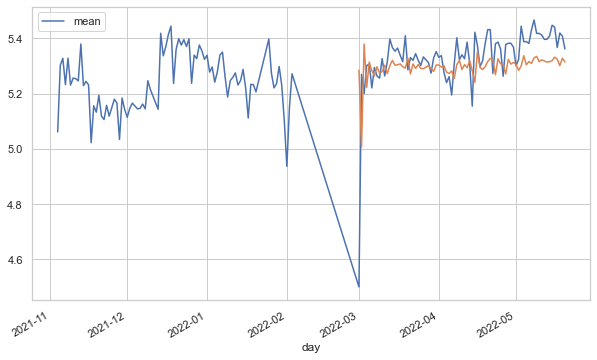

In [74]:
# 预测

model = sm.tsa.ARIMA(data_gb6_1, order=(0,0,1))
results = model.fit()
predict_sunspots = results.predict(start=str('2022-3-1'),end=str('2022-05-20'),dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_gb6_1.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [75]:
#预估下一个值

results.forecast()[0]

array([5.3028279])

### (2) monthly_data

### 自相关

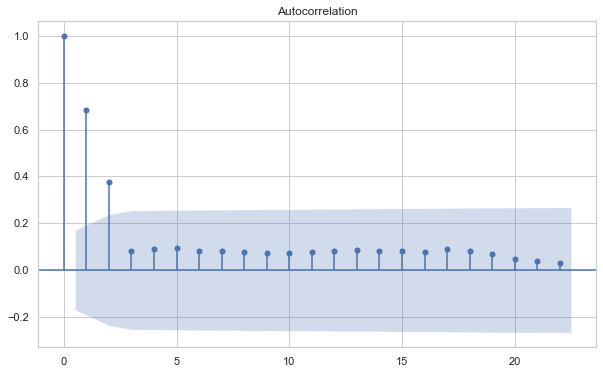

In [76]:
# 绘制自相关图，判断序列是否自相关

fig = plot_acf(data_gb7_3)
fig.set_size_inches(10, 6)
plt.show()

由自相关图可以看出，在3阶后才落入区间内，并且自相关系数均大于零，显示出很强的自相关性。

### 平稳性检验

In [77]:
# 返回值依次为 adf 、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

ADF(data_gb7_3)

(-2.9308252121592195,
 0.04187907924259433,
 6,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 134.32224261804956)

### 时间序列的差分d

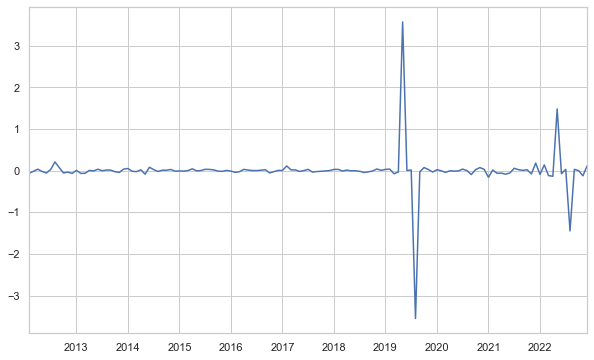

In [78]:
# 时间序列的差分d

D_data2 = data_gb7_3.diff().dropna()
D_data2.columns = ['price first difference']
D_data2.plot(figsize=(10,6)) #时序图
plt.show()

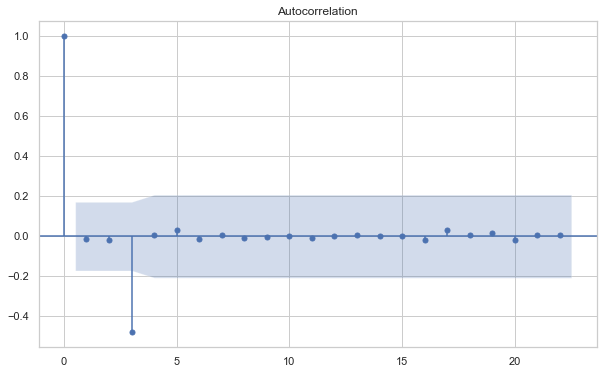

In [79]:
# 自相关图

fig = plot_acf(D_data2)
fig.set_size_inches(10, 6)
plt.show()

差分后的序列迅速落入区间，并呈现向0靠拢的趋势，序列没有自相关性。

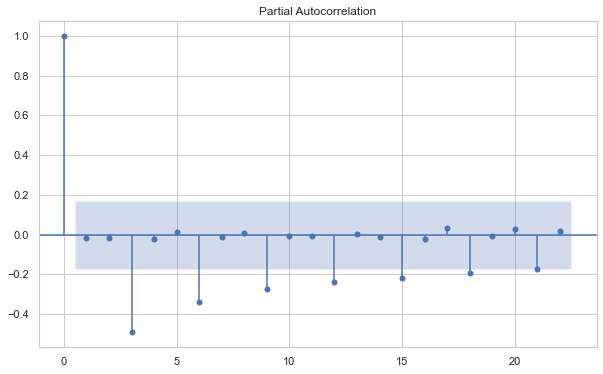

In [80]:
# 偏自相关检验

fig = plot_pacf(D_data2)
fig.set_size_inches(10, 6)
plt.show()

In [81]:
# 白噪声检验

acorr_ljungbox(D_data2,lags=20,return_df =bool) # lags表示滞后的阶数

,lb_stat,lb_pvalue
1,0.036087,8.493358e-01
2,0.077549,9.619676e-01
3,31.571611,6.442508e-07
4,31.574931,2.336555e-06
5,31.715634,6.763410e-06
6,31.750175,1.821887e-05
7,31.758911,4.501559e-05
8,31.774108,1.022289e-04
9,31.777229,2.175751e-04
10,31.777350,4.361150e-04


白噪声检验不通过，做进一步差分操作。

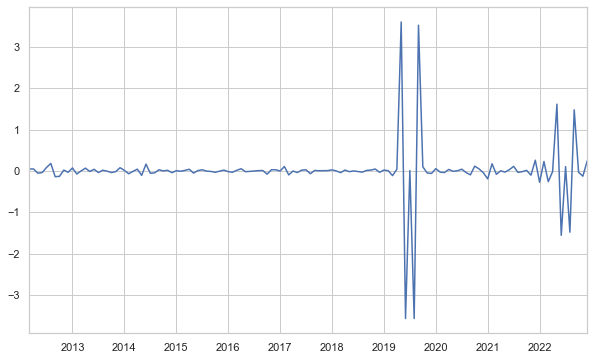

In [82]:
# 时间序列的差分d

D_data3 = D_data2.diff().dropna()
D_data3.columns = ['price first difference']
D_data3.plot(figsize=(10,6)) #时序图
plt.show()

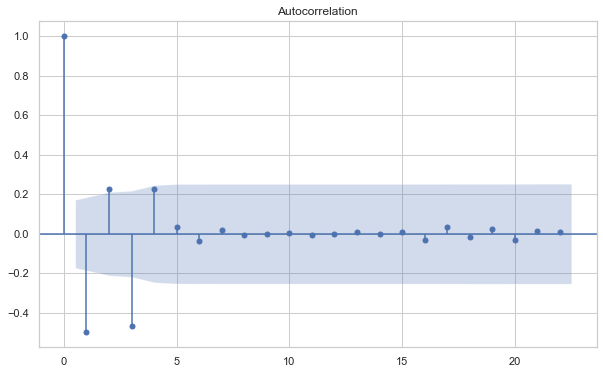

In [83]:
# 自相关图

fig = plot_acf(D_data3)
fig.set_size_inches(10, 6)
plt.show()

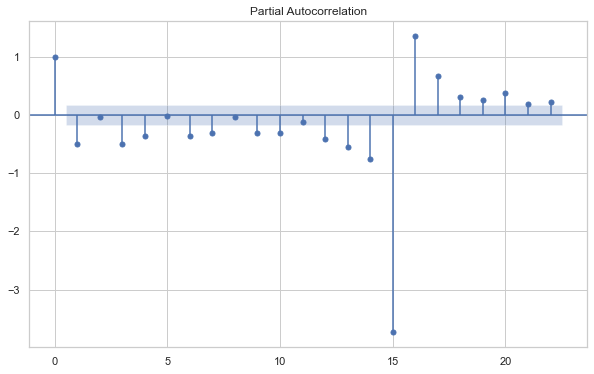

In [84]:
# 偏自相关检验

fig = plot_pacf(D_data3)
fig.set_size_inches(10, 6)
plt.show()

In [85]:
# 白噪声检验

acorr_ljungbox(D_data3,lags=20,return_df =bool) # lags表示滞后的阶数

,lb_stat,lb_pvalue
1,33.132306,8.609629e-09
2,40.060459,1.999778e-09
3,69.567015,5.284086e-15
4,76.694478,8.728106e-16
5,76.851968,3.818992e-15
6,77.018329,1.473419e-14
7,77.060323,5.468068e-14
8,77.070963,1.896312e-13
9,77.071089,6.155786e-13
10,77.073598,1.875845e-12


###  p,q值的确定

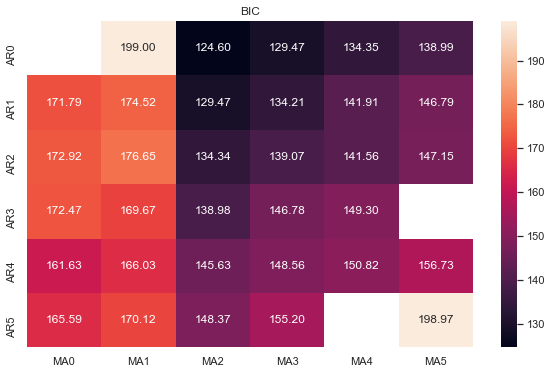

In [86]:
# 遍历，寻找适宜的参数

import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(data_gb7_3, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [87]:
train_results = sm.tsa.arma_order_select_ic(data_gb7_3, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

AIC (1, 3)
BIC (1, 3)


### 模型检验

对于选择的模型，观察ARMA模型的残差是否是平均值为0且方差为常数（服从零均值、方差不变的正态分布），同时也要观察连续残差是否（自）相关。

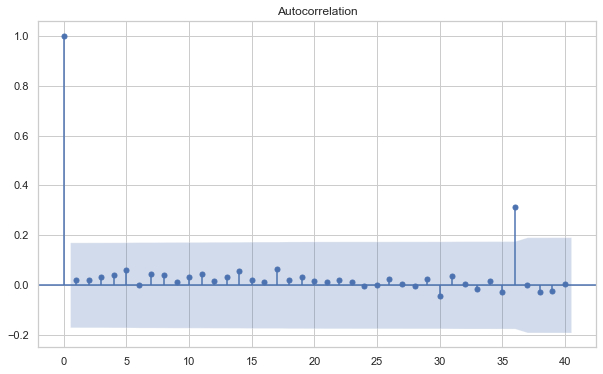

In [88]:
# 残差序列的随机性

model = sm.tsa.ARIMA(data_gb7_3, order=(1, 0, 3))
results = model.fit()
resid = results.resid #赋值
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
fig.set_size_inches(10, 6)
plt.show()

### 模型预测

2012-01-31    5.388443
2012-02-29    5.178636
2012-03-31    5.152067
2012-04-30    5.178756
2012-05-31    5.180890
                ...   
2023-08-31    5.379831
2023-09-30    5.379874
2023-10-31    5.379918
2023-11-30    5.379961
2023-12-31    5.380004
Freq: M, Length: 144, dtype: float64


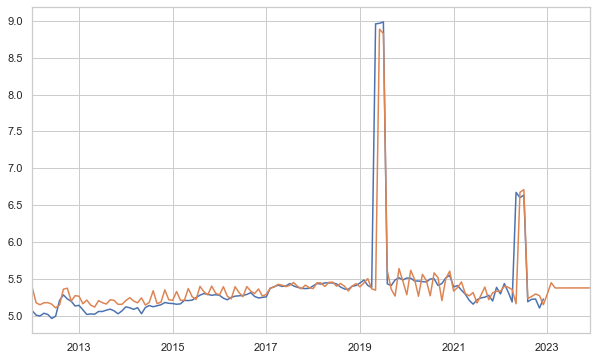

In [89]:
model = sm.tsa.ARIMA(data_gb7_3, order=(1, 0, 3))
results = model.fit()
predict_sunspots = results.predict(start=str('2012-01-31'),end=str('2023-12-31'),dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_gb7_3.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()